In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, r2_score, silhouette_score

In [2]:
dataset = pd.read_csv('Datasets/Football_ds.csv')

In [3]:
dataset.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [4]:
dataset.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16928\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
Goals,1.000000,0.829698,-0.189157,-0.001185,0.717834,0.694214,-0.495579,0.852152
Shots pg,0.829698,1.000000,-0.369343,-0.105080,0.759153,0.684035,-0.382147,0.851265
yellow_cards,-0.189157,-0.369343,1.000000,0.368847,-0.164302,-0.184238,0.060116,-0.417049
red_cards,-0.001185,-0.105080,0.368847,1.000000,-0.083360,-0.043761,-0.031791,-0.162358
Possession%,0.717834,0.759153,-0.164302,-0.083360,1.000000,0.851458,-0.543970,0.734978
Pass%,0.694214,0.684035,-0.184238,-0.043761,0.851458,1.000000,-0.764788,0.668573
AerialsWon,-0.495579,-0.382147,0.060116,-0.031791,-0.543970,-0.764788,1.000000,-0.327225
Rating,0.852152,0.851265,-0.417049,-0.162358,0.734978,0.668573,-0.327225,1.000000


In [5]:
dataset.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,52.183673,11.851020,69.704082,3.336735,49.995918,80.441837,16.006122,6.646122
std,16.445691,2.149718,15.137316,2.148814,4.890068,4.690172,3.078955,0.132148
min,20.000000,7.100000,40.000000,0.000000,38.500000,66.500000,9.500000,6.410000
25%,40.250000,10.325000,60.000000,2.000000,46.225000,78.025000,14.025000,6.540000
50%,50.000000,11.450000,67.500000,3.000000,49.750000,80.800000,16.100000,6.630000
75%,61.750000,13.350000,80.000000,4.750000,52.850000,83.450000,17.850000,6.730000
max,99.000000,17.100000,117.000000,10.000000,62.400000,89.700000,26.800000,7.010000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [7]:
dataset.shape

(98, 10)

<Axes: xlabel='Tournament', ylabel='count'>

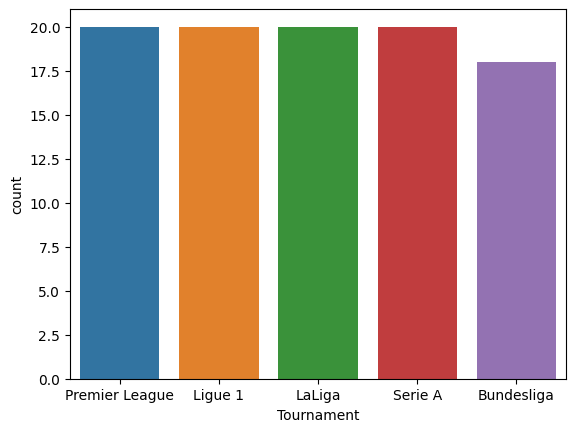

In [8]:
sns.countplot(x = 'Tournament', data=dataset, order = dataset['Tournament'].value_counts().index)

In [9]:
# dataset['Age'] = dataset['Age'].astype(int)
dreg = dataset

In [10]:
dreg.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [11]:
dreg = dreg.drop(['Team', 'Tournament'], axis=1)

In [12]:
dreg.head()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,83,15.8,46,2,60.8,89.4,12.8,7.01
1,99,17.1,44,3,58.1,85.5,12.9,6.95
2,86,15.0,73,7,60.1,89.5,9.5,6.88
3,85,15.3,68,2,62.4,89.7,10.6,6.87
4,67,14.4,57,2,57.7,87.7,11.8,6.86


In [13]:
dreg.isnull().sum()

Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [14]:
x = dreg.iloc[:,:-1].values
y = dreg.iloc[:,-1].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [16]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (68, 7)
y_train:  (68,)
x_test:  (30, 7)
y_test:  (30,)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model_reg=LinearRegression()

In [19]:
model_reg.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model_reg.predict(x_test)

In [21]:
y_pred_train = model_reg.predict(x_train)

In [22]:
# y_pred

In [23]:
# y_test

In [24]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.03441109151537045
Mean Squared Error: 0.0019137463339912605
Root Mean Squared Error: 0.04374638652496067


In [25]:
print("Accuracy : ", r2_score(y_test, y_pred))

Accuracy :  0.8342981123881962


In [26]:
Xnew = [[92, 16.3, 70, 8, 62, 83.4, 10]]

ynew = model_reg.predict(Xnew)

print("Predicted Rating : ",ynew)

Predicted Rating :  [6.85515616]


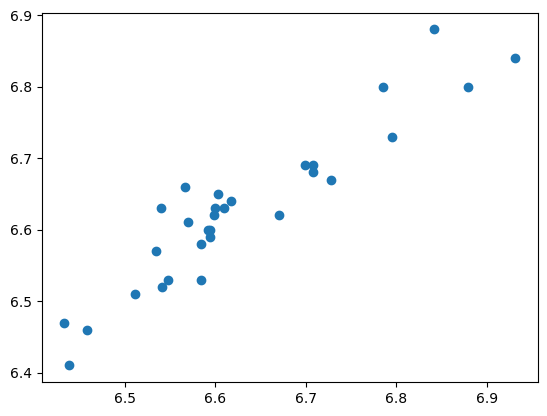

In [27]:
plt.scatter(y_pred,y_test)

In [28]:
dclas = dataset

In [29]:
dclas.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [30]:
dclas = dclas.drop(['Team'], axis = 1)

In [31]:
dclas.head()

,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [32]:
dclas.isnull().sum()

Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [33]:
x1 = dclas.iloc[:,1:].values
y1 = dclas.iloc[:,0].values

In [34]:
x1

array([[ 83.  ,  15.8 ,  46.  ,   2.  ,  60.8 ,  89.4 ,  12.8 ,   7.01],
       [ 99.  ,  17.1 ,  44.  ,   3.  ,  58.1 ,  85.5 ,  12.9 ,   6.95],
       [ 86.  ,  15.  ,  73.  ,   7.  ,  60.1 ,  89.5 ,   9.5 ,   6.88],
       [ 85.  ,  15.3 ,  68.  ,   2.  ,  62.4 ,  89.7 ,  10.6 ,   6.87],
       [ 67.  ,  14.4 ,  57.  ,   2.  ,  57.7 ,  87.7 ,  11.8 ,   6.86],
       [ 73.  ,  13.8 ,  64.  ,   1.  ,  54.5 ,  84.8 ,  14.5 ,   6.85],
       [ 77.  ,  15.7 ,  76.  ,   6.  ,  55.4 ,  88.3 ,  11.4 ,   6.85],
       [ 55.  ,  13.7 ,  63.  ,   4.  ,  49.1 ,  78.6 ,  19.4 ,   6.84],
       [ 75.  ,  14.6 ,  43.  ,   1.  ,  57.5 ,  85.5 ,  12.8 ,   6.84],
       [ 67.  ,  12.1 , 100.  ,   0.  ,  51.8 ,  83.1 ,  14.4 ,   6.84],
       [ 90.  ,  16.3 ,  66.  ,   3.  ,  53.5 ,  83.5 ,  16.8 ,   6.84],
       [ 58.  ,  14.6 ,  49.  ,   3.  ,  58.6 ,  87.  ,  15.2 ,   6.83],
       [ 68.  ,  16.  ,  40.  ,   0.  ,  59.  ,  85.7 ,  14.3 ,   6.82],
       [ 74.  ,  14.7 ,  80.  ,   4.  ,  51.4 ,  84

In [35]:
y1

array(['Premier League', 'Bundesliga', 'Ligue 1', 'LaLiga', 'LaLiga',
       'Premier League', 'Serie A', 'Premier League', 'Bundesliga',
       'LaLiga', 'Serie A', 'Premier League', 'Premier League', 'Serie A',
       'Ligue 1', 'Premier League', 'Serie A', 'Premier League',
       'Bundesliga', 'Serie A', 'Ligue 1', 'Bundesliga', 'Premier League',
       'Premier League', 'Premier League', 'Bundesliga', 'Bundesliga',
       'Ligue 1', 'Serie A', 'LaLiga', 'Bundesliga', 'Premier League',
       'Ligue 1', 'Bundesliga', 'Premier League', 'Serie A', 'Ligue 1',
       'LaLiga', 'LaLiga', 'Premier League', 'LaLiga', 'Premier League',
       'Ligue 1', 'Ligue 1', 'Premier League', 'Ligue 1', 'Serie A',
       'Ligue 1', 'Ligue 1', 'Bundesliga', 'Premier League',
       'Premier League', 'Serie A', 'Ligue 1', 'Bundesliga', 'Ligue 1',
       'Premier League', 'Bundesliga', 'LaLiga', 'LaLiga', 'Ligue 1',
       'Serie A', 'Serie A', 'Ligue 1', 'Ligue 1', 'Bundesliga',
       'Serie A', 'Bund

In [36]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 1)

In [37]:
print("x_train: ",x1_train.shape)
print("y_train: ",y1_train.shape)
print("x_test: ",x1_test.shape)
print("y_test: ",y1_test.shape)

x_train:  (68, 8)
y_train:  (68,)
x_test:  (30, 8)
y_test:  (30,)


In [38]:
# Logistic Regression
model_lr = LogisticRegression()

In [39]:
model_lr.fit(x1_train, y1_train)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred_lr = model_lr.predict(x1_test)

In [41]:
print("Accuracy : ", accuracy_score(y1_test, y_pred_lr))

Accuracy :  0.5


In [42]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [43]:
model_knn.fit(x1_train,y1_train)

KNeighborsClassifier()

In [44]:
y_pred_knn = model_knn.predict(x1_test)

In [45]:
print("Accuracy : ", accuracy_score(y1_test, y_pred_knn))

Accuracy :  0.4666666666666667


In [46]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [47]:
model_dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [48]:
y_pred_dt = model_dt.predict(x1_test)

In [49]:
print("Accuracy : ", accuracy_score(y1_test, y_pred_dt))

Accuracy :  0.4


In [50]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [51]:
model_nb.fit(x1_train,y1_train)

GaussianNB()

In [52]:
y_pred_nb = model_nb.predict(x1_test)

In [54]:
print("Accuracy : ", accuracy_score(y1_test, y_pred_nb))

Accuracy :  0.4


In [55]:
from sklearn.svm import SVC
model_svc = SVC(gamma='auto')

In [56]:
model_svc.fit(x1_train,y1_train)

SVC(gamma='auto')

In [57]:
y_pred_svc = model_nb.predict(x1_test)

In [58]:
print("Accuracy : ", accuracy_score(y1_test, y_pred_svc))

Accuracy :  0.4


In [59]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [60]:
model_rf.fit(x1_train,y1_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [61]:
y_pred_rf = model_nb.predict(x1_test)

In [62]:
print("Accuracy : ", accuracy_score(y1_test, y_pred_svc))

Accuracy :  0.4


In [64]:
Xnew = [[100, 18, 46, 5, 54.5, 82.8, 14.7, 5.2]]

ynew = model_lr.predict(Xnew)

print("Tournament : ",ynew)

Tournament :  ['Premier League']


In [ ]:
# All classifications are under 50%